In [1]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

**Introduction to the functional API**

In [3]:
from keras import Input, layers

input_tensor = Input(shape=(32,))
dense = layers.Dense(32, activation='relu')

output_tensor = dense(input_tensor)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [0]:
?Input

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

import numpy as np

x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(x_train, y_train)


Epoch 1/10
1000/1000 [==============================] - 0s 251us/step - loss: 12.1575
Epoch 2/10
1000/1000 [==============================] - 0s 19us/step - loss: 13.1889
Epoch 3/10
1000/1000 [==============================] - 0s 17us/step - loss: 14.3079
Epoch 4/10
1000/1000 [==============================] - 0s 14us/step - loss: 15.3944
Epoch 5/10
1000/1000 [==============================] - 0s 15us/step - loss: 16.6057
Epoch 6/10
1000/1000 [==============================] - 0s 15us/step - loss: 17.7438
Epoch 7/10
1000/1000 [==============================] - 0s 16us/step - loss: 19.3938
Epoch 8/10
1000/1000 [==============================] - 0s 15us/step - loss: 21.1837
Epoch 9/10
1000/1000 [==============================] - 0s 16us/step - loss: 23.5295
Epoch 10/10
1000/1000 [==============================] - 0s 45us/step


**Multi-input models**

In [0]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')

embedded_text = layers.Embedding(
    64, text_vocabulary_size)(text_input)

encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,),
                       dtype='int32',
                       name='question')

embedded_question = layers.Embedding(
    32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question],
                                  axis=-1)

answer = layers.Dense(answer_vocabulary_size,
                      activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [8]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 10000)  640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 10000)  320000      question[0][0]                   
____________________________________________________________________________________________

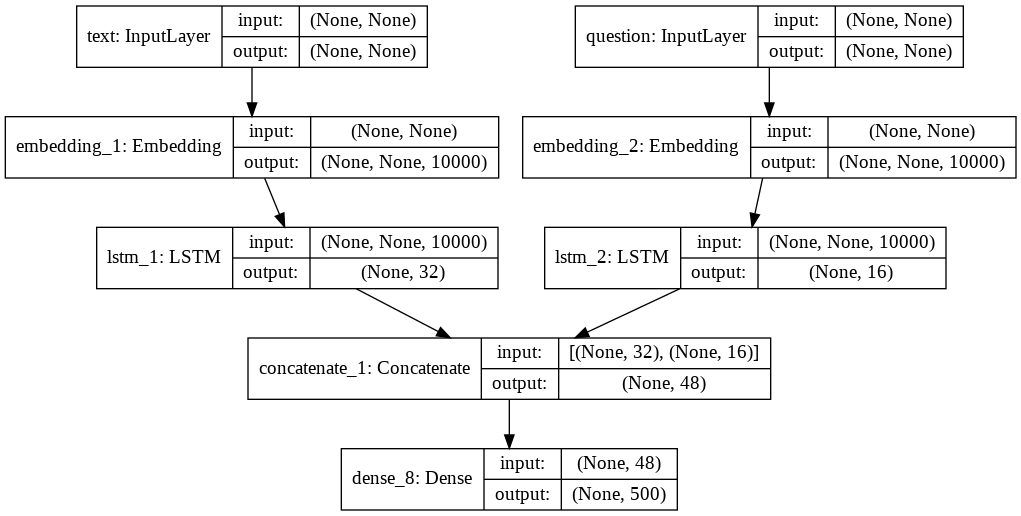

In [9]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='Multi-input.png')

from IPython.display import Image
Image(filename='Multi-input.png')

In [10]:
import numpy as np

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size,
                         size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,
                             size=(num_samples, max_length))
answers = np.random.randint(0, 1,
                            size=(num_samples, answer_vocabulary_size))

model.fit([text, question], answers, epochs=10, batch_size=128)

#model.fit({'text': text, 'question': question}, answers,
#          epochs=10, batch_size=128)

Epoch 1/10


InvalidArgumentError: ignored

**Multi-output models**

In [11]:
from keras import layers
from keras import Input
from keras.models import Model
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups,
                                 activation='softmax',
                                 name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input,
              [age_prediction, income_prediction, gender_prediction])

In [12]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

model.compile(optimizer='rmsprop',
              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'})


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1., 10.])

model.compile(optimizer='rmsprop',
              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'},
              loss_weights={'age': 0.25,
                            'income': 1.,
                            'gender': 10.})


In [14]:
model.fit(posts, [age_targets, income_targets, gender_targets],
          epochs=10, batch_size=64)

model.fit(posts, {'age': age_targets,
                  'income': income_targets,
                  'gender': gender_targets},
          epochs=10, batch_size=64)


NameError: ignored

**Directed acyclic graphs of layers**

**Inception**

In [15]:
from keras import layers

branch_a = layers.Conv2D(128, 1,
                         activation='relu', strides=2)(x)
branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)
output = layers.concatenate(
    [branch_a, branch_b, branch_c, branch_d], axis=-1)

model = Model(x, output)

ValueError: ignored

In [16]:
model.summary() #

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    32000128    embedding_3[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 128)    0           conv1d_1[0][0]                   
____________________________________________________________________________________________

In [0]:
from keras import layers

x = ...
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

y = layers.add([y, x])

In [0]:
from keras import layers

x = ...
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y)

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)

y = layers.add([y, residual])

In [0]:
from keras import layers
from keras import Input
from keras.models import Model

lstm = layers.LSTM(32)
left_input = Input(shape=(None, 128))
left_output = lstm(left_input)

right_input = Input(shape=(None, 128))
right_output = lstm(right_input)

merged = layers.concatenate([left_output, right_output], axis=-1)
predictions = layers.Dense(1, activation='sigmoid')(merged)

model = Model([left_input, right_input], predictions)
model.fit([left_data, right_data], targets)

In [0]:
y = model(x)

In [0]:
y1, y2 = model([x1, x2])

**Xception**

In [0]:
from keras import layers
from keras import applications
from keras import Input

xception_base = applications.Xception(weights=None,
                                      include_top=False)

left_input = Input(shape=(250, 250, 3))
right_input = Input(shape=(250, 250, 3))

left_features = xception_base(left_input)
right_input = xception_base(right_input)

merged_features = layers.concatenate(
    [left_features, right_input], axis=-1)

**ResNet**

In [0]:
from keras import layers

x = Input(shape=(32, 32, 3))
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
z = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
z = layers.Conv2D(128, 3, activation='relu', padding='same')(z)

z = layers.add([z, y])

model = Model(x, z)